<strong><h1 style="text-align:center;">PTS de data<h1></strong>

In [9]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import os

pd.options.mode.chained_assignment = None

In [10]:
#Lecture du fichier
datas = pd.read_csv("datasets" + os.sep + "Agribalyse_Synthese.csv", encoding="utf-8", sep=",",index_col=0)

In [11]:
#Copier le fichier pour le traiter ensuite
dataCopy = datas.copy()
dataCopy.head()

,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,Préparation,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
Code AGB,,,,,,,,,,,,,,,,,,,,,
11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,Pas de préparation,...,6.108019e-09,0.099733,0.001868,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088
11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,Pas de préparation,...,4.343632e-10,0.006246,0.000125,0.002379,0.012785,5.672531,20.508995,2.585763,12.701604,0.000007
11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,Pas de préparation,...,2.824785e-10,0.002036,0.000069,0.002197,0.006394,4.064650,18.871203,3.104146,6.275385,0.000004
11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,Pas de préparation,...,5.867577e-10,0.008112,0.000203,0.004050,0.031181,5.534832,36.288833,5.290335,12.553109,0.000005
20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,Pas de préparation,...,6.108019e-09,0.099733,0.001868,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088


In [12]:
#Enlever le code ciqual car inutile
dataCopy = dataCopy.drop("Code CIQUAL", axis=1)

<h1>Traitement des données qualitatives ordinales</h1>

In [13]:
livraisonList = []
for i in range(0,len(datas["Livraison"])):
    if dataCopy["Livraison"].iloc[i] not in livraisonList:
        livraisonList.append(dataCopy["Livraison"].iloc[i])
    dataCopy["Livraison"].iloc[i] = livraisonList.index(dataCopy["Livraison"].iloc[i])

In [14]:
emballageList = []
for i in range(0,len(datas["Matériau d'emballage"])):
    if dataCopy["Matériau d'emballage"].iloc[i] not in emballageList:
        emballageList.append(dataCopy["Matériau d'emballage"].iloc[i])
    dataCopy["Matériau d'emballage"].iloc[i] = emballageList.index(dataCopy["Matériau d'emballage"].iloc[i])

In [15]:
preparationList = []
for i in range(0,len(datas["Préparation"])):
    if dataCopy["Préparation"].iloc[i] not in preparationList:
        preparationList.append(dataCopy["Préparation"].iloc[i])
    dataCopy["Préparation"].iloc[i] = preparationList.index(dataCopy["Préparation"].iloc[i])

<h1>Vérification de la transformation des données qualitatives en données quantitatives</h1>

In [16]:
for j in dataCopy["Préparation"]:
    if type(j)==str:
        print(j)  

In [17]:
for j in dataCopy["Livraison"]:
    if type(j)==str:
        print(j)

In [18]:
for j in dataCopy["Matériau d'emballage"]:
    if type(j)==str:
        print(j)

In [19]:
total = 0
for i in dataCopy.columns:
    for j in dataCopy[i]:
        if j == "":
            total += 1
            
print(total)

0


<h1>Regression linéaire</h1>

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dataCopy.select_dtypes(include=['number']).drop("Score unique EF", axis=1)
y = datas["Score unique EF"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results = {
 "Résultats réels":y_test,
  "Résultats prédits": y_pred,
}

pd.DataFrame(results)

,Résultats réels,Résultats prédits
Code AGB,,
26022,2.334830,2.334830
18022,0.012941,0.012941
16411,0.675377,0.675377
13020,0.274436,0.274436
9231,0.187403,0.187403
...,...,...
20536,0.069839,0.069839
7413,0.191433,0.191433
11034,0.397232,0.397232


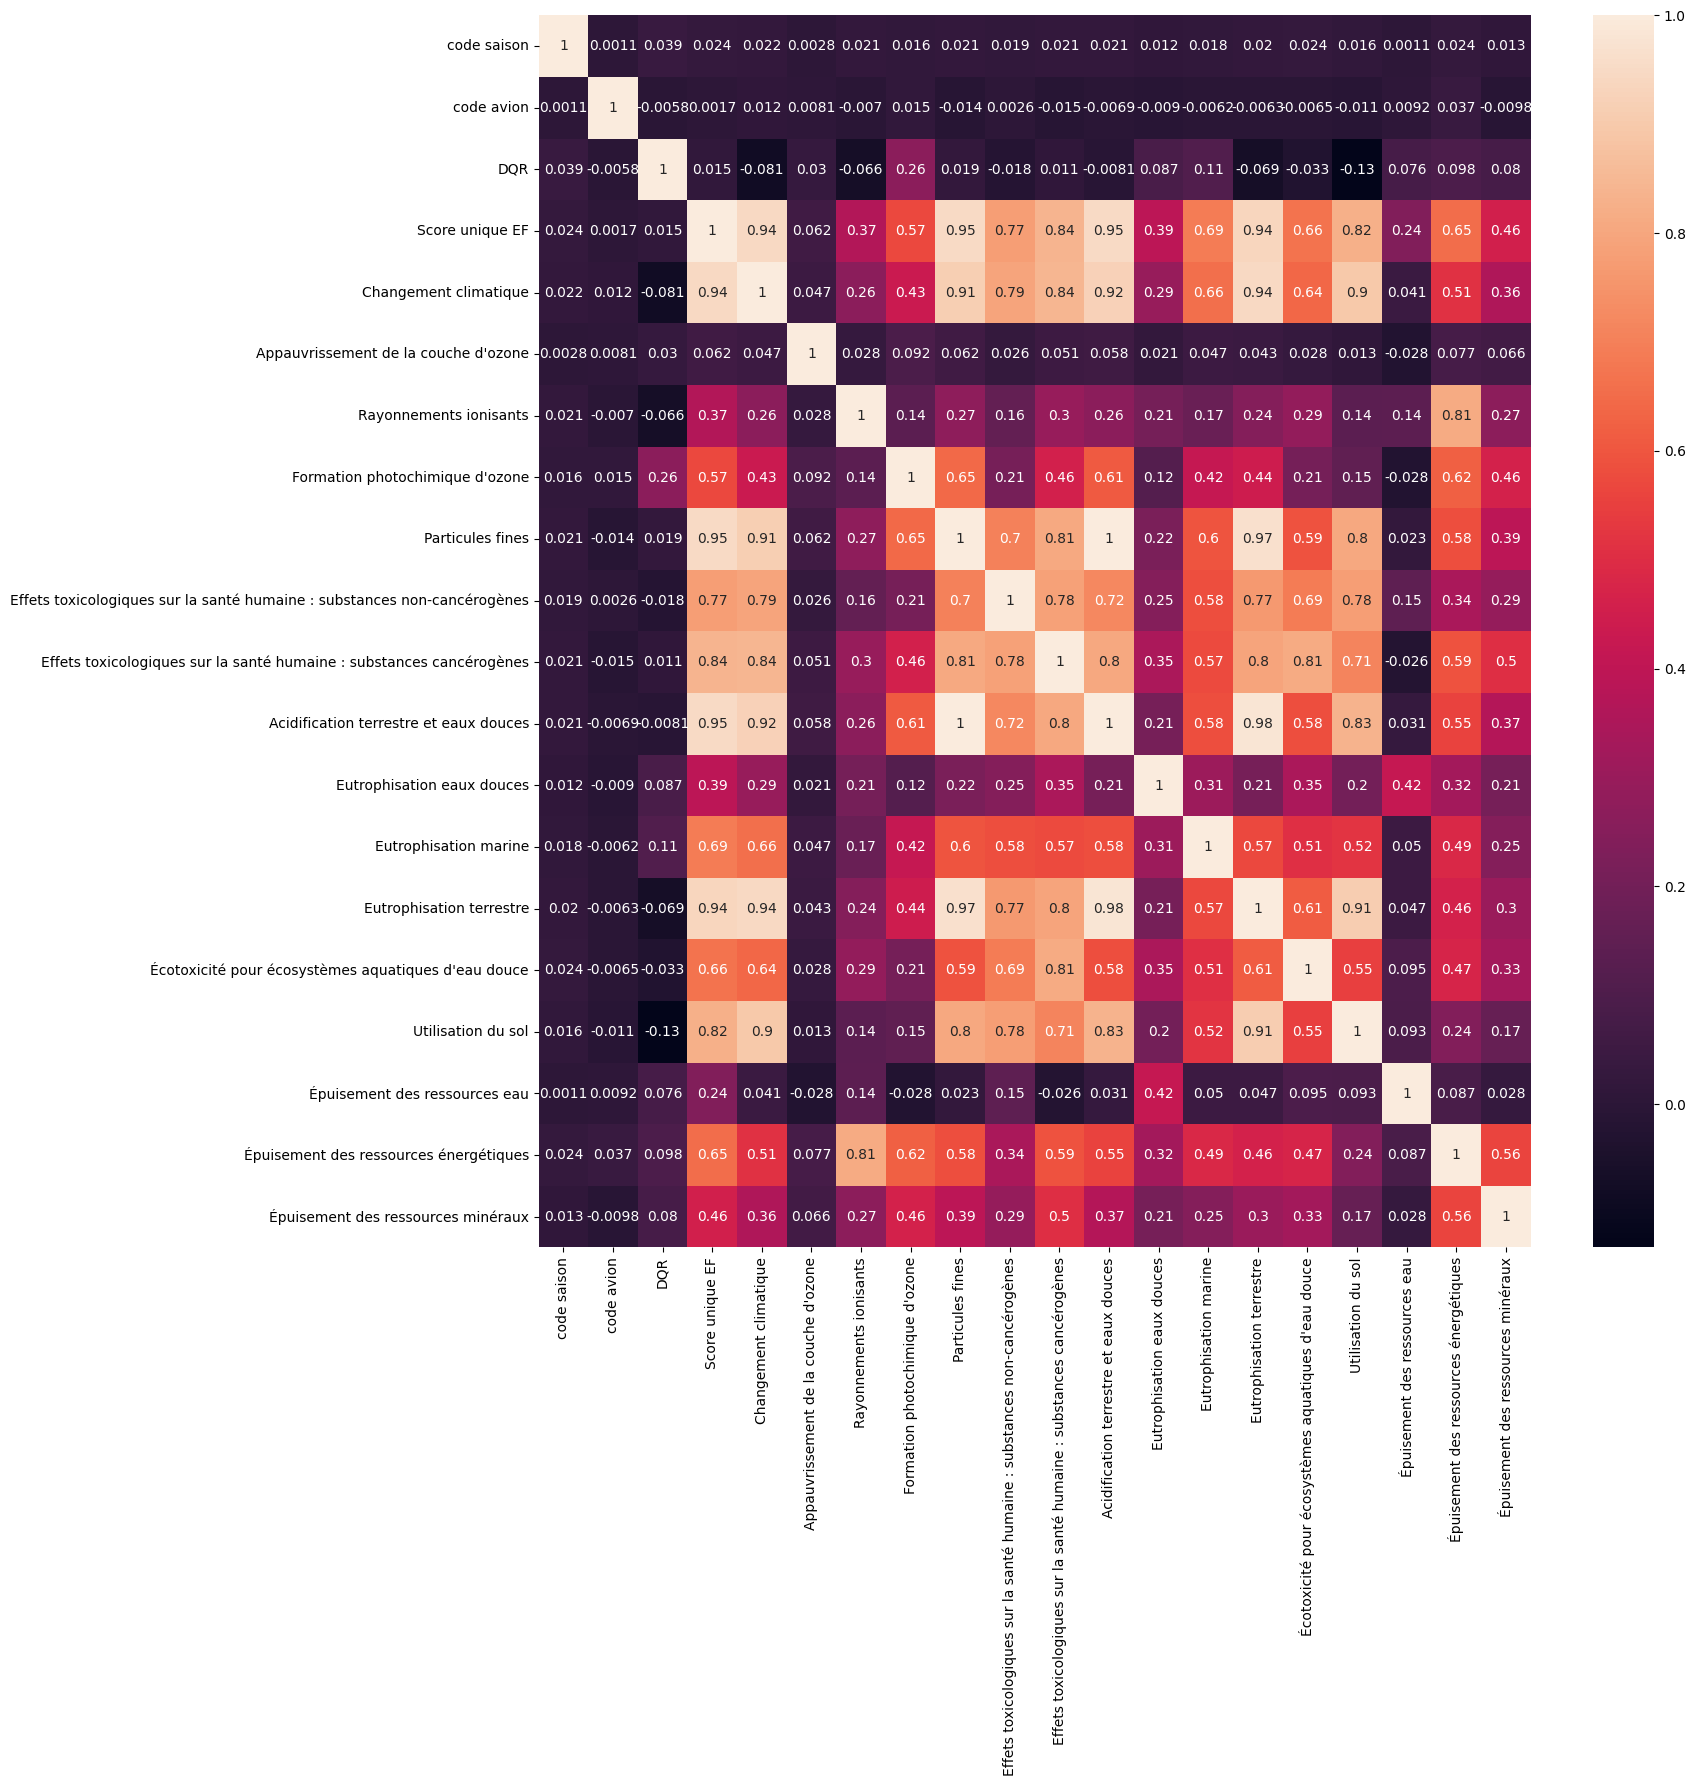

In [21]:
dataHeatMap = dataCopy.select_dtypes(exclude=['object'])
plt.figure(figsize=(16, 16))
sns.heatmap(dataHeatMap.corr(), annot=True)
plt.show()

<p>On remarque que la majorité de nos variables sont liés. On le voit par une corrélation assez importante (>0.5). </p>
<p>Ici, nous allons étudier le score EF.</p>
<p>Le Score Unique EF est obtenu selon la méthodologie PEF (Product Environmental Footprint). Il est obtenue par l'agrégation des 16 indicateurs d'impact et s'exprime en milli-points (mPt). Plus le Score Unique EF est proche de zéro et plus l'empreinte environnementale du produit est faible. </p>
<p>L'étudier va nous permettre de savoir le score unique EF qu'aura un futur élément en fonction des paramètres que nous allons lui donner. Cela servia donc aux agriculteurs pour savoir dans quelles conditions il faut mettre chaque élément de leur agriculture.</p>


In [22]:
# Statistiques de base, description statistiques de chaque colonne du jeu de donnée
dataCopy.describe()

,code saison,code avion,DQR,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000,2518.000000,2.518000e+03,2.518000e+03,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,1.997617,0.000794,2.768168,0.674660,5.352347,5.295133e-07,1.016800,0.021514,5.722425e-07,8.106852e-08,3.614483e-09,0.078641,0.000851,0.028298,0.308978,52.695938,319.016989,5.187148,49.166213,2.101284e-05
std,0.062987,0.028177,0.553070,0.856597,7.605873,4.873864e-06,1.602772,0.043885,8.831605e-07,1.328885e-07,4.619379e-09,0.127071,0.002070,0.050263,0.528213,64.363114,655.840955,19.500297,54.387211,4.273932e-05
min,0.000000,0.000000,1.200000,0.012941,0.039161,2.711347e-09,0.023043,0.000120,5.374447e-09,1.041913e-09,5.612756e-11,0.000490,0.000013,0.000213,0.001103,0.660594,-42.220580,-222.183850,1.710196,6.177173e-07
25%,2.000000,0.000000,2.380000,0.157586,1.111978,1.184973e-07,0.301996,0.003565,8.112941e-08,1.743184e-08,8.915459e-10,0.009368,0.000202,0.005295,0.033723,13.187684,33.445734,0.793924,19.787166,7.176604e-06
50%,2.000000,0.000000,2.680000,0.349165,2.448059,2.030205e-07,0.668826,0.007197,2.373566e-07,3.792691e-08,2.181853e-09,0.031714,0.000445,0.012962,0.117878,33.997363,120.790285,2.057243,30.596413,1.247782e-05
75%,2.000000,0.000000,3.090000,0.862760,6.222165,5.523210e-07,1.116586,0.018092,7.068223e-07,7.240328e-08,4.657096e-09,0.088815,0.000865,0.028895,0.331958,61.935446,288.546528,5.336188,61.166026,2.388837e-05
max,2.000000,1.000000,4.870000,5.813351,50.917912,2.433486e-04,30.373306,0.389954,6.190059e-06,1.546013e-06,6.289898e-08,0.912512,0.032660,0.670953,4.038975,1085.818340,5525.755000,477.447230,710.666870,1.286939e-03


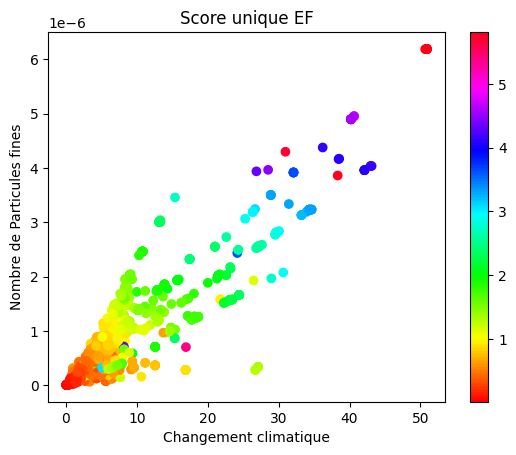

In [23]:
plt.scatter(x=dataCopy['Changement climatique'].values,y = dataCopy['Particules fines'].values,c = dataCopy["Score unique EF"].values, cmap='hsv')
plt.xlabel('Changement climatique')
plt.ylabel('Nombre de Particules fines')
plt.title('Score unique EF')
plt.colorbar()
plt.show()


<p>On remarque qu'il y a une corrélation positive entre le changement climatique et le nombre de particules fines. Donc le nombre de particules fines est une composante significative du changement climatique ou bien que les processus qui contribuent à un changement élevé produit également des particules fines.</p> 
<p>On peut voir que le score unique EF augmente avec l'augmentation du changement climatique ainsi que du nombre de particules fines. On peut donc déduire que le changement climatique et le nombre de particules fines sont des facteurs du score unique EF.</p>
<p>On remarque aussi que les points sont dispersés, ce qui signifie que d'autres facteurs non représentés sur le graphique ont une influence sur le score EF.</p>
<p>On peut tout de même conclure que si l'on veut un score EF très faible, et donc pour avoir un produit avec une empreinte environnementale faible, il faudrait un nombre de particules fines très faible et donc un impact sur le changement climatique très faible. En effet, l'exposition des produits à de la pollution ainsi que la dégradation du climat semblent intuitivement être un facteur agravant de la qualité du produit.</p>

# Régression linéaire multi-variée 

Nous cherchons la relation entre le score Environmental Footprint et les différents impacts du produit sur l'environnement. Ensuite, nous allons étudier le caractère significatif partiel et total de la regression. 


In [24]:
X_ = dataCopy.select_dtypes(include=['number']).drop("Score unique EF", axis=1)
y_ = datas["Score unique EF"]

#créer un objet reg lin
modeleReg=LinearRegression()

modeleReg.fit(X_,y_)

results = {
 "label":["constante"]+list(X_.columns)+["Score"],
  "coeff": np.concatenate((modeleReg.intercept_.reshape(1,-1), modeleReg.coef_,modeleReg.score(X_,y_)), axis=None),
}

pd.DataFrame(results)

,label,coeff
0,constante,-5.774120e-10
1,code saison,-5.221413e-10
2,code avion,-4.471643e-09
3,DQR,6.165687e-10
4,Changement climatique,2.788265e-02
5,Appauvrissement de la couche d'ozone,1.205386e+03
6,Rayonnements ionisants,1.187158e-02
7,Formation photochimique d'ozone,1.169871e+00
8,Particules fines,1.504955e+05
9,Effets toxicologiques sur la santé humaine : s...,1.429285e+05


## Caractère signicatif conjoint des coefficients 

On calcule les caractéristiques en terme de SCE, SCR et SCT de cette régression. Le premier test d'hypothèse consiste à savoir le caractère significatif total de la régression. 

In [25]:
import statistics
#calcul de SCR
SCR =((y_-modeleReg.predict(X_))**2).sum() 
#calcul de SCT
SCT =((y_-statistics.mean(y_))**2).sum() 
#calcul de SCE
SCE =((modeleReg.predict(X_)-statistics.mean(y_))**2).sum() 
n = len(y_)
p = X_.shape[1]
R = SCE/SCT; 
F = (SCE/p)/(SCR/(n-p-1))

results = {
 "label":["SCR"]+["SCE"]+["SCT"]+["Score R2"] + ["Fisher"],
  "coeff": np.concatenate((SCR, SCE,SCT, R, F),axis=None),
}

pd.DataFrame(results)

,label,coeff
0,SCR,3.930615e-13
1,SCE,1.846871e+03
2,SCT,1.846871e+03
3,Score R2,1.000000e+00
4,Fisher,6.177531e+17


<p>La valeur du SCR est très proche de zéro, ce qui indique que la variation non expliquée par le modèle est extrêmement faible.</p>
<p>La valeur du SCE est très grande ce qui signifie que le modèle explique une grande partie de la variation dans les données.</p>
<p>La valeur du SCT est identique à celle du SCE, indiquant la même chose que la valeur du SCT, c'est-à-dire que le modèle explique en grande partie la variation des données.</p>
<p>La valeur du coefficient de détermination (Score R2) nous indique que le modèle explique parfaitement la variance des données.</p>
<p>Enfin, la valeur du test de Fisher étant très élevée, on peut déduire que le modèle de régression linéaire est significatif et donc un bon modèle.</p>

## Caractère significatif partiel de la régression 

Ensuite, nous allons nous interesser au caractère significatif partiel de la régression. Nous devrons pour cela retrouver la matrice de covariance et retrouver son inverse. 

On commence d'abord par retrouver les variables explicatives centrées et réduites. Pour chaque colonne X on retranche la moyenne et on normalise par la variance. Un package scaler de Python permet de faire cette opération. 

In [26]:
# Pour retrouver la matrice de covariance 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
# suppression de la colonne Annual
scale = scaler.set_output(transform="pandas")

# Il faudra toujours trouver les variables centrées et réduites
scaled_db = scale.fit_transform(X_)


In [27]:
n = scaled_db.shape[0]
p = scaled_db.shape[1]
S = np.zeros((n,p)); 
for i,x in enumerate(X_.columns):
    S[:,i] = np.array(scaled_db[x])
Rxx = np.dot(S.T,S)
print('La matrice de covariance est :')
pd.DataFrame(Rxx)

La matrice de covariance est :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2518.000000,2.686269,97.897637,54.384901,7.157085,52.601459,39.857207,53.632445,46.639056,51.776360,53.771650,29.951261,46.504155,51.281757,59.840490,39.054105,2.732169,59.348272,33.516580
1,2.686269,2518.000000,-14.529255,29.899030,20.444051,-17.713765,39.020993,-35.083560,6.538056,-38.510795,-17.309957,-22.592398,-15.573104,-15.827814,-16.256391,-26.663754,23.135129,93.119570,-24.743489
2,97.897637,-14.529255,2518.000000,-203.691915,74.483188,-166.707502,666.633087,48.335051,-46.005406,26.982881,-20.418657,218.330433,276.140840,-174.973561,-82.897693,-331.458578,191.759872,246.445628,201.177619
3,54.384901,29.899030,-203.691915,2518.000000,117.877375,660.580718,1082.877107,2302.238451,2000.009852,2118.021415,2326.049534,740.644089,1650.133269,2374.760657,1610.167383,2254.389919,104.008981,1288.722777,901.680748
4,7.157085,20.444051,74.483188,117.877375,2518.000000,71.466299,231.855108,155.860630,64.749813,127.193319,145.982954,53.582919,117.692675,107.531402,70.884430,32.488752,-71.245203,193.661854,165.604691
5,52.601459,-17.713765,-166.707502,660.580718,71.466299,2518.000000,342.973824,685.267232,396.990462,748.093285,667.161930,523.082304,438.574057,616.243121,720.566285,345.634922,357.506684,2047.483734,679.598789
6,39.857207,39.020993,666.633087,1082.877107,231.855108,342.973824,2518.000000,1627.386990,533.172005,1152.370255,1528.742718,293.903937,1055.511423,1111.183884,524.487213,378.833314,-70.527649,1563.041696,1167.967085
7,53.632445,-35.083560,48.335051,2302.238451,155.860630,685.267232,1627.386990,2518.000000,1770.708304,2037.880688,2508.827323,550.998846,1504.707999,2435.818237,1486.265226,2026.949305,57.422783,1469.967712,990.309829
8,46.639056,6.538056,-46.005406,2000.009852,64.749813,396.990462,533.172005,1770.708304,2518.000000,1974.966207,1809.988579,621.682881,1470.432222,1927.295686,1733.149572,1955.687200,367.714220,864.045331,736.406620
9,51.776360,-38.510795,26.982881,2118.021415,127.193319,748.093285,1152.370255,2037.880688,1974.966207,2518.000000,2023.884536,870.830552,1439.799205,2005.578475,2047.682565,1784.569664,-64.303912,1490.523445,1260.325589


In [28]:
# Filtrage des données
# Objectif : Créer un dataset qui ne prenne qu'une seule occurence de chaque type de sous-groupe d'aliment différent
# Permet de réduire le dataset de 2518 à 61 lignes.

oneit_db = dataCopy.copy()
alist = []
mask = []

for i, x in enumerate(oneit_db["Sous-groupe d'aliment"]):
    if x in alist:
        mask.append(False)
    else:
        mask.append(True)
        alist.append(x)


filtered_oneit_db = oneit_db[mask]

print(alist) # Vérification que tous les types de sous-groupes aient été traités
filtered_oneit_db

['algues', 'herbes', 'ingrédients divers', 'épices', 'aides culinaires', 'sauces', 'sels', 'condiments', 'denrées destinées à une alimentation particulière', 'céréales et biscuits infantiles', 'laits et boissons infantiles', 'desserts infantiles', 'petits pots salés et plats infantiles', 'boisson alcoolisées', 'boissons sans alcool', 'eaux', 'plats composés', 'feuilletées et autres entrées', 'soupes', 'plats végétariens', 'sandwichs', 'pizzas, tartes et crêpes salées', 'salades composées et crudités', 'fruits', 'fruits à coque et graines oléagineuses', 'légumes', 'pommes de terre et autres tubercules', 'légumineuses', 'glaces', 'desserts glacés', 'sorbets', 'fromages', 'produits laitiers frais et assimilés', 'crèmes et spécialités à base de crème', 'laits', 'beurres', 'huiles et graisses végétales', 'autres matières grasses', 'huiles de poissons', 'margarines', 'pâtes, riz et céréales', 'farines et pâtes à tarte', 'gâteaux et pâtisseries', 'pains et viennoiseries', 'céréales de petit-d

,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,Préparation,DQR,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
Code AGB,,,,,,,,,,,,,,,,,,,,,
11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,0,0,0,2.990000,...,6.108019e-09,0.099733,0.001868,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088
11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,0,1,0,4.110000,...,4.343632e-10,0.006246,0.000125,0.002379,0.012785,5.672531,20.508995,2.585763,12.701604,0.000007
37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,2,0,0,3,0,2.890000,...,1.281360e-09,0.019283,0.000310,0.006705,0.079039,19.241559,94.993989,0.449383,23.187248,0.000017
11025,aides culinaires et ingrédients divers,épices,"Cannelle, poudre","Cinnamon, powder",2,0,0,1,0,3.370000,...,3.090506e-09,0.088815,0.001451,0.069161,0.554170,160.566140,696.690070,18.363092,71.837424,0.000115
11172,aides culinaires et ingrédients divers,aides culinaires,"Court-bouillon pour poissons, déshydraté","Aromatic stock cube, for fish, dehydrated",2,0,0,4,0,3.550000,...,6.812990e-09,0.069943,0.002822,0.029954,0.187664,63.714656,112.324030,9.179842,710.666870,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25224,"viandes, œufs, poissons",substituts de viande,Bouchées ou émincé au soja et blé (ne convient...,Soy-based sliced,2,0,1,8,6,1.963951,...,1.984023e-09,0.013444,0.000553,0.008807,0.037633,49.793218,110.728050,0.816975,95.339030,0.000013
10037,"viandes, œufs, poissons",mollusques et crustacés cuits,"Calmar ou calamar ou encornet, bouilli/cuit à ...","Squid, boiled/cooked in water",2,0,1,11,3,3.520000,...,4.080865e-09,0.181748,0.000255,0.043975,0.480719,23.690577,15.027532,0.406132,99.227548,0.000023
10001,"viandes, œufs, poissons",mollusques et crustacés crus,"Calmar ou calamar ou encornet, cru","Squid, raw",2,0,1,11,0,3.640000,...,3.351617e-09,0.148832,0.000265,0.036439,0.394305,21.029986,12.360117,0.329260,76.736600,0.000018


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler() 
# suppression des colonnes string
db = filtered_oneit_db.drop(columns = ["Groupe d'aliment","Sous-groupe d'aliment","Nom du Produit en Français","LCI Name","Matériau d'emballage"])
scale = scaler.set_output(transform="pandas")

# Il faudra toujours trouver les variables centrées et réduites
scaled_db = scale.fit_transform(db)

pca = PCA()
pca.fit(scaled_db)

PCA()

In [30]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(22)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,1.106281e+01,54.0,54.0
1,Dim2,2.455655e+00,12.0,66.0
2,Dim3,1.703288e+00,8.0,75.0
3,Dim4,1.380426e+00,7.0,82.0
4,Dim5,9.991002e-01,5.0,87.0
5,Dim6,8.441423e-01,4.0,91.0
6,Dim7,6.705045e-01,3.0,94.0
7,Dim8,4.932116e-01,2.0,96.0
8,Dim9,2.919106e-01,1.0,98.0
9,Dim10,2.182878e-01,1.0,99.0


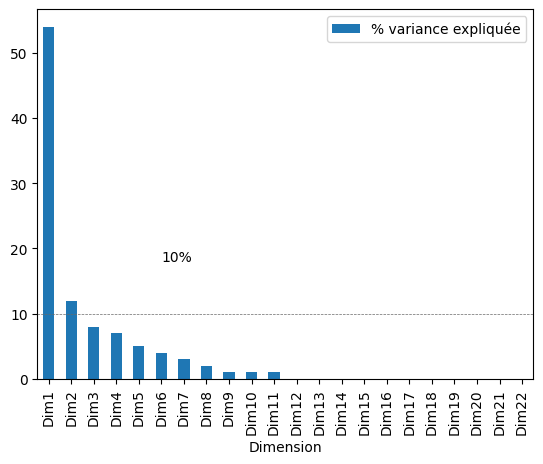

In [31]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "10%") # ajout de texte
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [32]:
db_pca = pca.transform(scaled_db)

In [33]:
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : db_pca[:,0], 
    "Dim2" : db_pca[:,1],
    "G Al" : filtered_oneit_db["Groupe d'aliment"],
    "SG Al" : filtered_oneit_db["Sous-groupe d'aliment"],
    "Mat" : filtered_oneit_db["Matériau d'emballage"],
})

# Résultat
data_pca_df

,Dim1,Dim2,G Al,SG Al,Mat
Code AGB,,,,,
11084,2.236974,4.364955,aides culinaires et ingrédients divers,algues,0
11023,-2.039472,0.151806,aides culinaires et ingrédients divers,herbes,1
37000,-1.588775,-0.174522,aides culinaires et ingrédients divers,ingrédients divers,3
11025,3.137613,1.685727,aides culinaires et ingrédients divers,épices,1
11172,3.992207,8.768994,aides culinaires et ingrédients divers,aides culinaires,4
...,...,...,...,...,...
25224,-0.737868,0.081685,"viandes, œufs, poissons",substituts de viande,8
10037,1.570146,1.156030,"viandes, œufs, poissons",mollusques et crustacés cuits,11
10001,0.711560,0.872374,"viandes, œufs, poissons",mollusques et crustacés crus,11


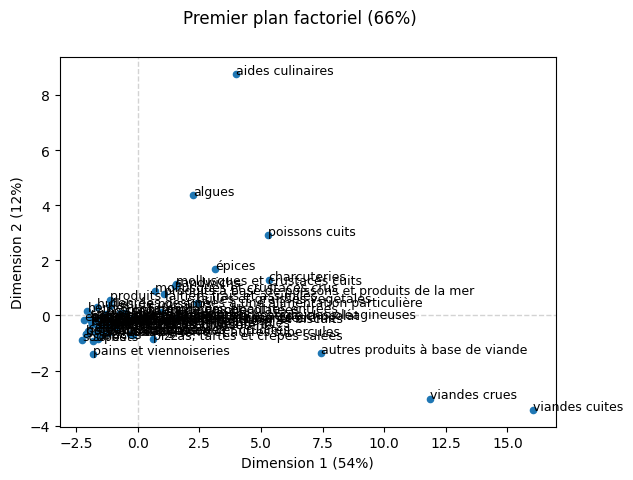

In [34]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
fig.suptitle("Dimensions réduites")
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique
# Ajout des axes
ax.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
ax.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# boucle sur chaque pays
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
        ax.annotate(k[1]["SG Al"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (54%)") 
plt.ylabel("Dimension 2 (12%)")
plt.suptitle("Premier plan factoriel (66%)")
plt.show()

<p>On voit que nous ne pouvons pas tirer grand chose de cet ACP. Par conséquent, nous allons faire le cercle de corrélations entre les variables.

In [35]:
n = db.shape[0] # nb individus
p = db.shape[1] # nb variables

print(n)
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': db.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

61


,id,COR_1,COR_2
0,code saison,0.000000e+00,-0.000000e+00
1,code avion,3.662297e-16,1.725459e-16
2,Livraison,9.710642e-02,-2.100681e-01
3,Préparation,3.931597e-01,-2.169131e-02
4,DQR,-8.224144e-05,3.754061e-01
5,Score unique EF,9.951439e-01,-1.899852e-02
6,Changement climatique,9.498010e-01,-1.600964e-01
7,Appauvrissement de la couche d'ozone,6.669236e-01,4.105094e-01
8,Rayonnements ionisants,2.873468e-01,8.087772e-01
9,Formation photochimique d'ozone,6.239882e-01,2.021700e-01


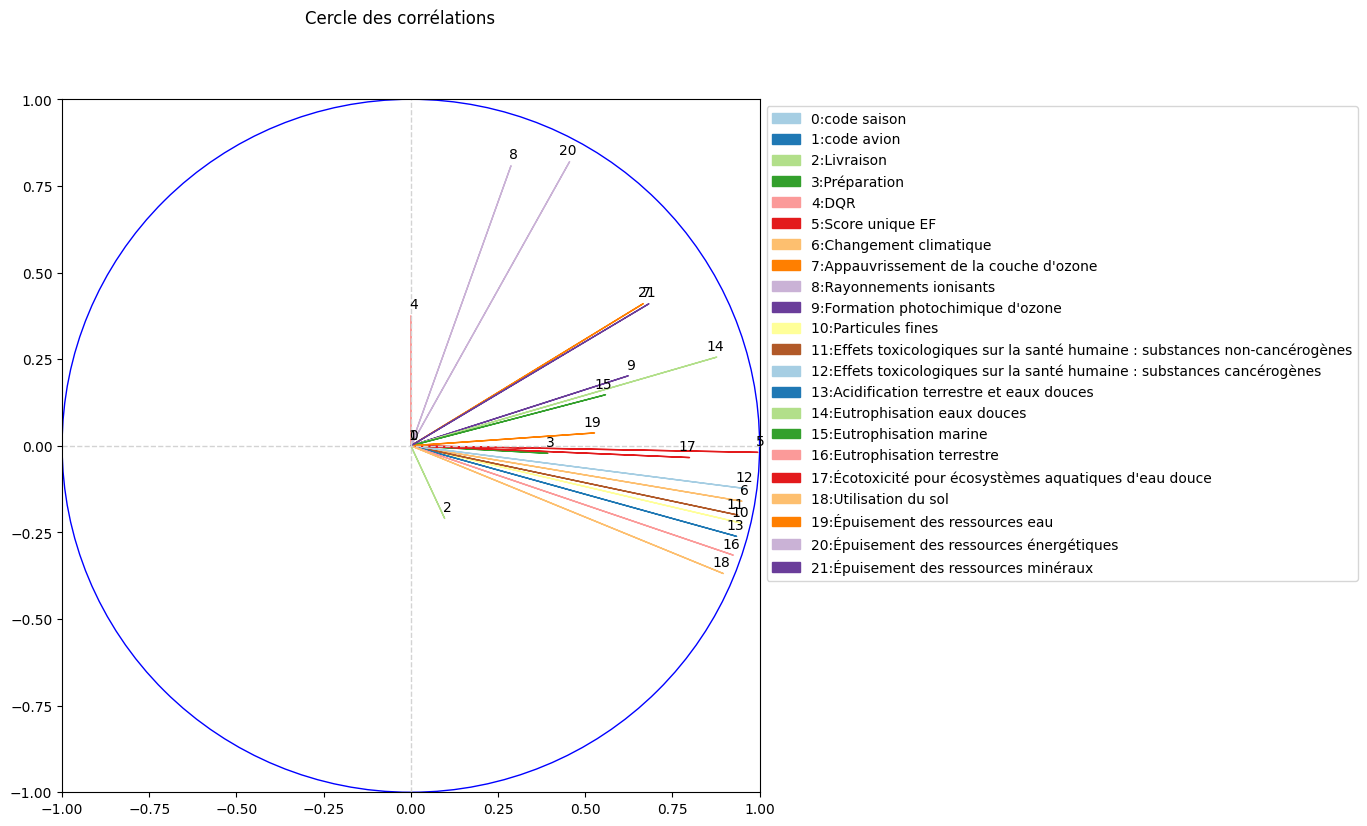

In [36]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
unique_ids = coordvar["id"].unique()
pal = sns.color_palette("Paired", n_colors=len(unique_ids))
couleurs = dict(zip(unique_ids, pal))
fig, axes = plt.subplots(figsize = (9,9))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(22):
    variable_id = coordvar["id"][j]
    plt.arrow(0, 0,
                coordvar["COR_1"][j],
                coordvar["COR_2"][j],
                color=couleurs[variable_id],
                label=str(j)+":"+variable_id,
                head_width=0.0,
                width=0.0001,
                )
    plt.annotate(j, (coordvar["COR_1"][j], coordvar["COR_2"][j]), textcoords="offset points", xytext=(5,5), ha='right')
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<p>Nous allons nous intéresser au lien entre le score unique EF et les autres variables.</p>
<p>Tout d'abord, on remarque que l'écotoxicité pour les écosystèmes aquatiques d'eau douce a un angle très faible avec le score EF. Cela signifie que le lien entre ces deux variables est très fort. Avoir un produit avec un score EF très faible est donc nécessairement non écotoxique pour les écosystèmes aquatiques d'eau douce.</p>
<p>Ensuite, sur l'ACP, on remarque une dizaine de variables ayant un angle faible (maximum PI/6) avec le score EF. Cela revient à dire que ces variables ont un impact non négligeable sur le score final du produit. Par exemple, si le produit a des effets toxicologiques sur la santé, alors le score EF va être plus important. (On rappelle que plus le score EF est proche de 0, plus le produit a un mauvais impact sur l'environnement) En effet, si le produit a des effes nocifs sur la santé, il en a aussi sur l'écosystème dans lequel le produit se développe.</p>
<p>4 variables (DQR(data quality ratio), les rayonnements ionisants, l'épuisement des ressources énergétiques et le transport) n'ont pas de liens ou presque avec le score EF. </p>
<p>Concernant le DQR, cela est tout à fait logique puisqu'il s'agit de la qualité des données. Cela explique seulement si la donnée est fiable ou non.</p>
<p>Le transport n'étant pas une variable numérique au début, le fait que l'impact soit faible ne semble pas étrange, l'attribution des valeurs à chaque type de transport étant aléatoire.</p>
<p>Cependant, concernant les deux autres, cela semble étrange. L'épuisement des ressources énergétiques est censé influencé le score EF. Il en va de même avec les rayonnements ionisants. Ces deux variables ont normalement un impact négatif sur l'environnement. Nous concluons donc qu'ils ont un effet mais que celui-ci n'est pas aussi important que les autres variables.</p>

<h1>Classification hiérarchique et dendrogramme</h1>

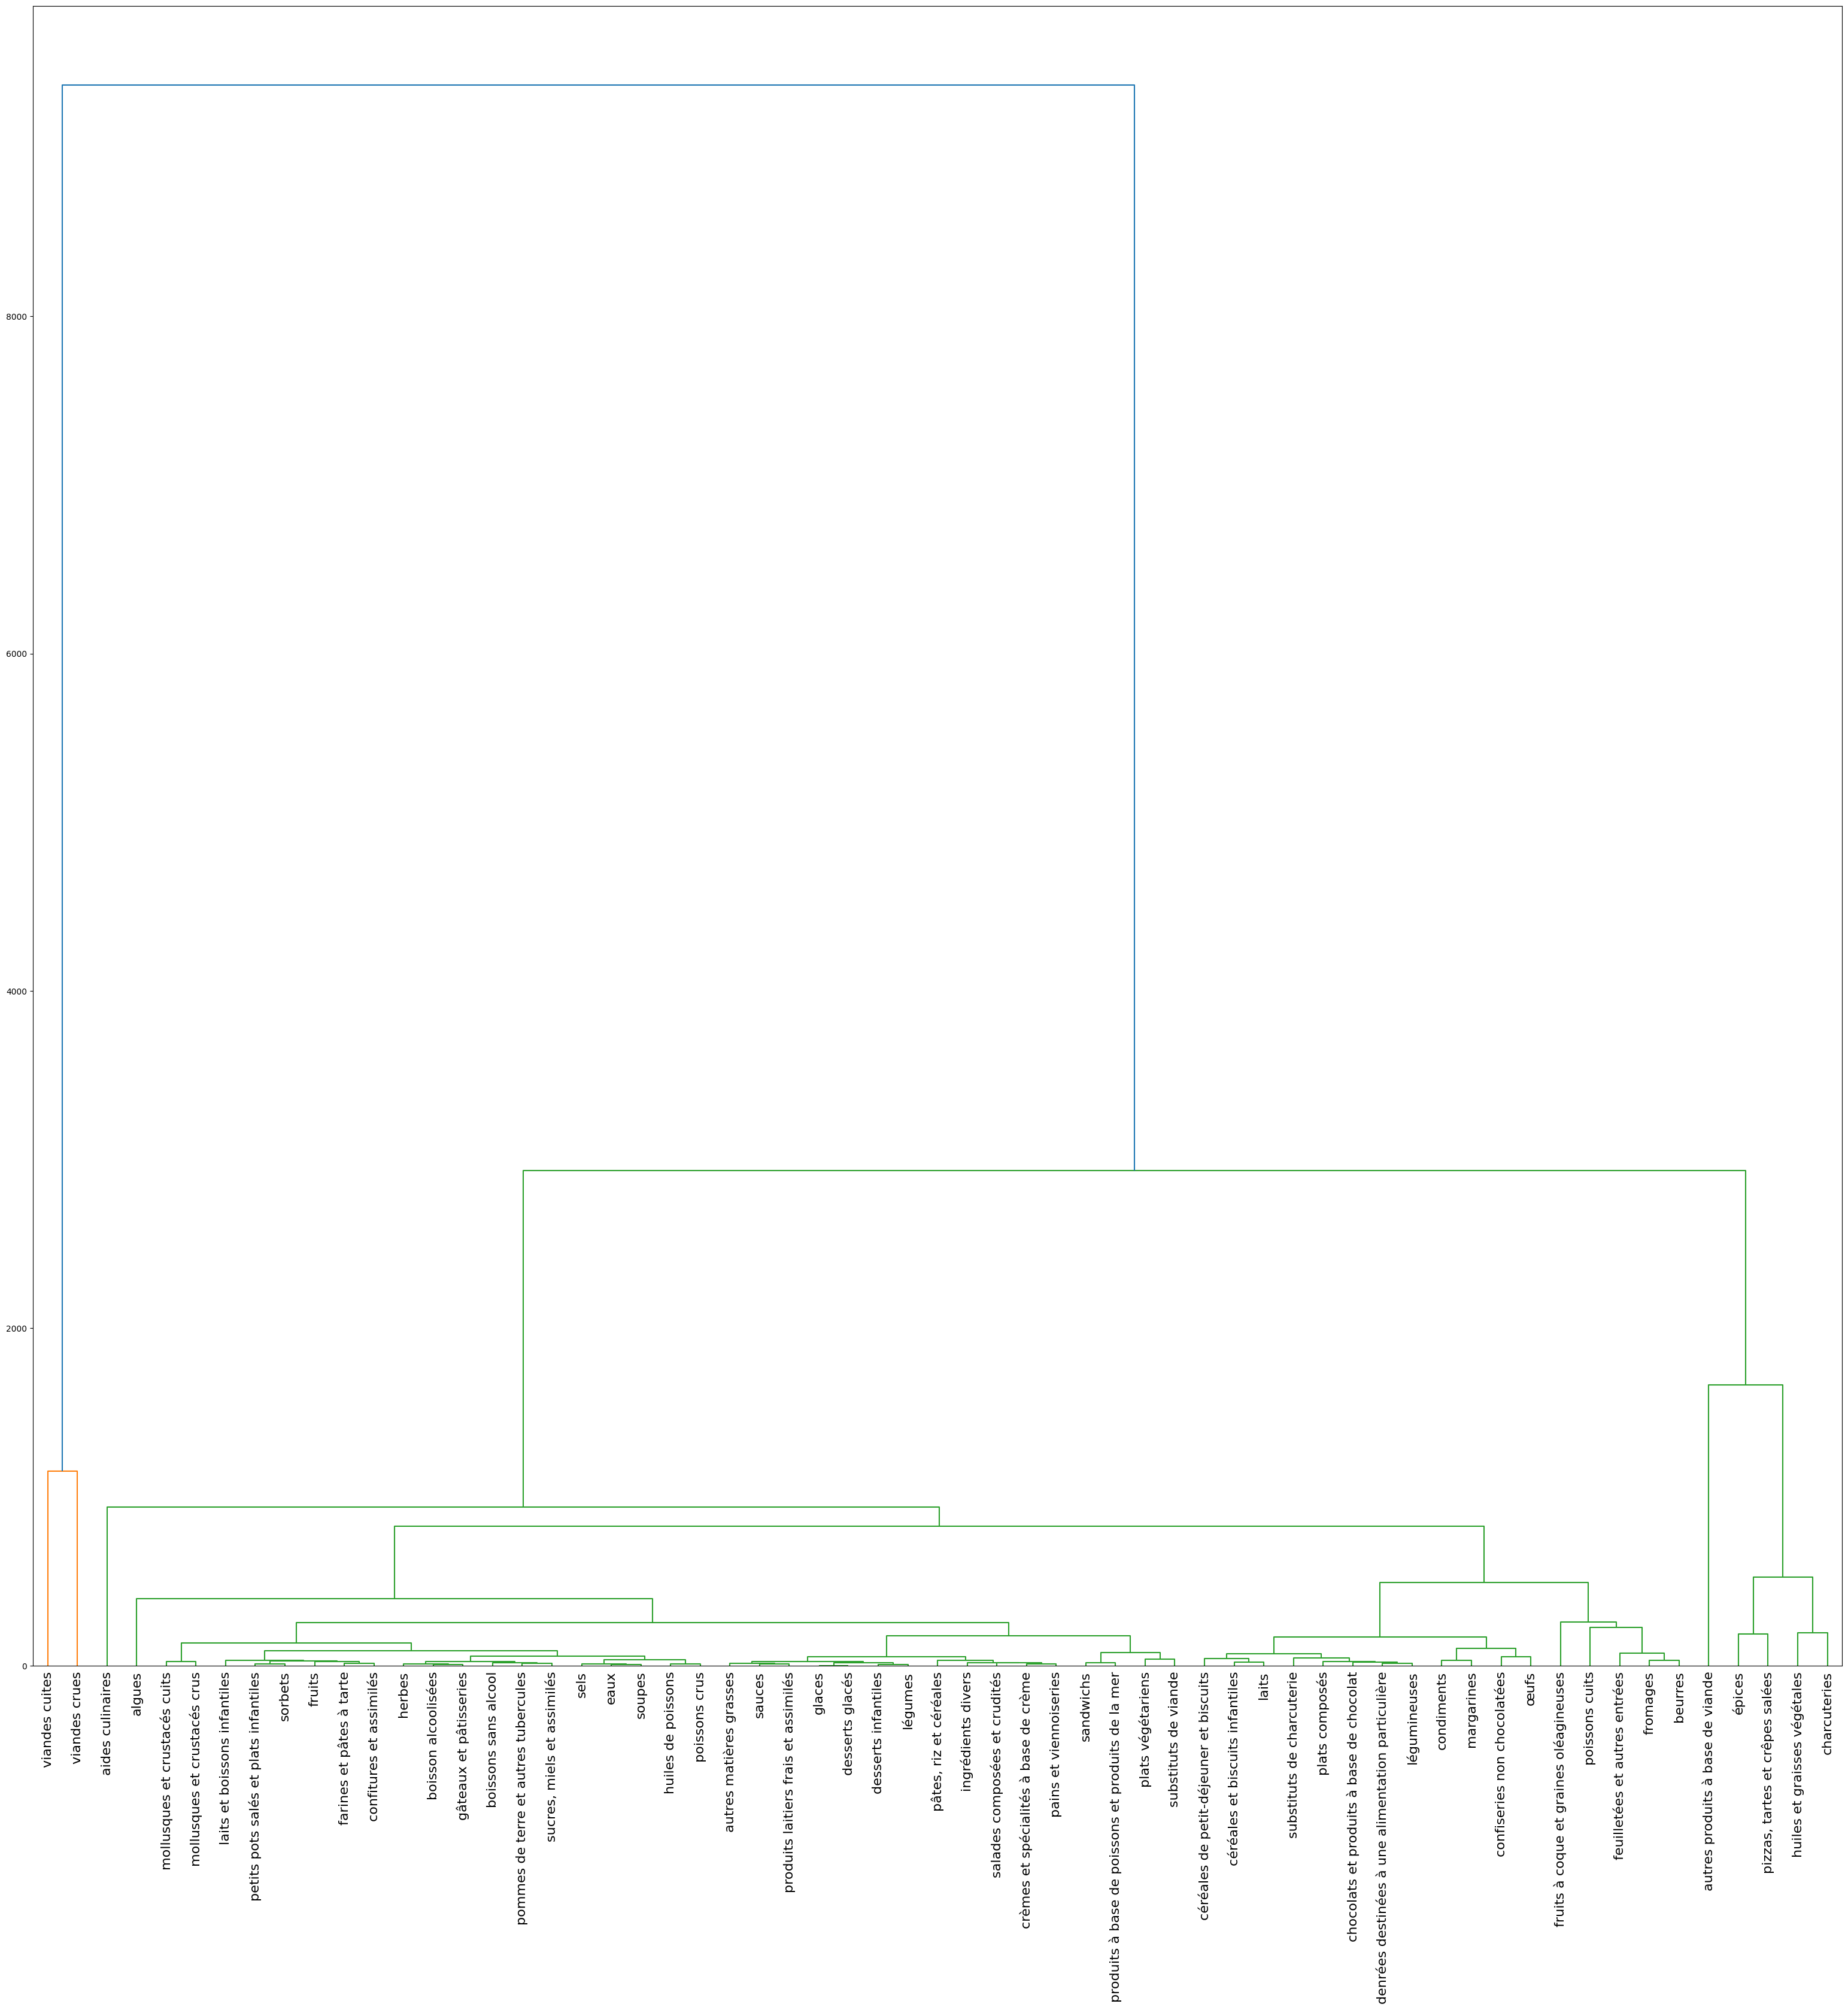

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

labelList = list(filtered_oneit_db["Sous-groupe d'aliment"])
Z2 = linkage(db, method='ward', metric='euclidean')
plt.figure(figsize=(39, 36))
dendrogram(
    Z2,
    leaf_rotation= 90,
    labels=labelList,
    distance_sort='ascending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

<p>
On peut remarquer 2 clusters, l'un (orange) avec les 2 types de viandes différentes (cuites ou crues), et l'autre (vert), qui est divisé en de nombreux sous-clusters, selon si les produits en question viennent de tel ou tel milieu (e.g. avec les feuilles du dendrogramme pour les céréales, pour les glaces, ou encore pour les mollusques et crustacés).
</p>

<h1>KNN<h1>

In [38]:
from sklearn.cluster import KMeans

kmeansn = KMeans(n_clusters = 2, n_init='auto') # n_init='auto' ==> retirer message d'erreur
kmeansn.fit(db)
pd.DataFrame(kmeansn.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,0.0,0.644068,1.067797,2.878,0.505944,3.939511,3.722914e-07,1.534587,0.017067,...,2.583305e-09,0.048481,0.000546,0.027301,0.181438,41.170926,185.481796,3.082663,56.376162,0.000018
1,2.0,0.0,1.000000,2.500000,2.640,5.195173,45.542987,1.035821e-06,1.680837,0.073417,...,2.336438e-08,0.817224,0.002998,0.178429,3.617664,208.885788,4946.995900,13.920219,111.279049,0.000056


In [39]:
pd.Series(kmeansn.labels_).value_counts()

0    59
1     2
Name: count, dtype: int64

In [40]:
db_kn = db.assign(classe = kmeansn.labels_)
db_kn.groupby("classe").mean()

,code saison,code avion,Livraison,Préparation,DQR,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
classe,,,,,,,,,,,,,,,,,,,,,
0,2.0,0.0,0.644068,1.067797,2.878,0.505944,3.939511,3.722914e-07,1.534587,0.017067,...,2.583305e-09,0.048481,0.000546,0.027301,0.181438,41.170926,185.481796,3.082663,56.376162,0.000018
1,2.0,0.0,1.0,2.5,2.640,5.195173,45.542987,1.035821e-06,1.680837,0.073417,...,2.336438e-08,0.817224,0.002998,0.178429,3.617664,208.885788,4946.995900,13.920219,111.279049,0.000056


<generator object DataFrame.iterrows at 0x000001E1862D7EF0>


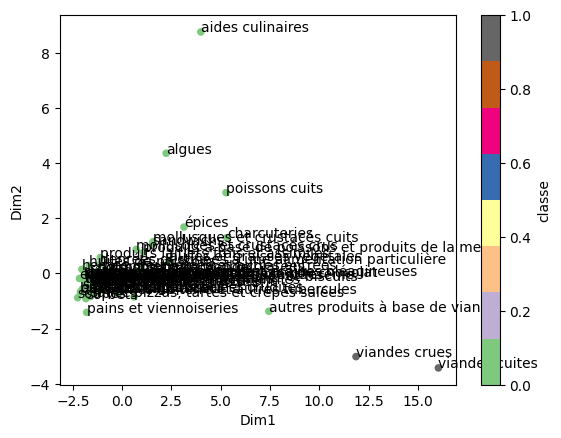

In [41]:
db_pca_kn = data_pca_df.assign(classe = kmeansn.labels_, sg = dataCopy["Sous-groupe d'aliment"])

coul_kmeans = dict(zip(db_pca_kn["classe"].unique(), (range(4))))

fig, ax = plt.subplots()

db_pca_kn.plot('Dim1', 'Dim2', kind='scatter', c = "classe",cmap = "Accent", ax=ax)

print(db_pca_kn.iterrows())
for index, row in db_pca_kn.iterrows():
    ax.annotate(row['sg'], (row['Dim1'], row['Dim2']))

plt.show()


<p>
Sur ce graphique, on retrouve à l'aide des couleurs de la palette la même classification en 2 classes que sur le dendrogramme. On a tout les produits qui ont un point de couleur verte, excepté pour les viandes crues et cuites (bas droite du graphique).
</p>

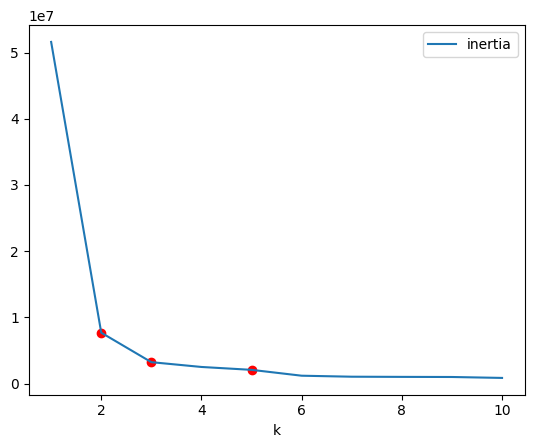

In [42]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(db)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.scatter(5, inertia.query('k == 5')["inertia"], c = "red")
plt.show()

Avec cette visualisation en courbe, nous pouvons dire qu’un nombre de 3 ou 4 clusters est pertinent.

R-squared =  0.954993183705322


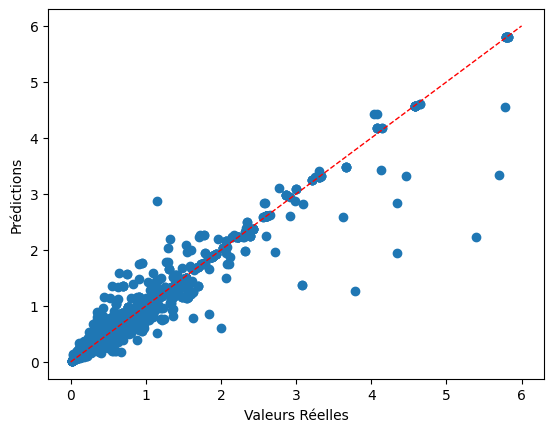

In [43]:
from sklearn.neighbors import KNeighborsRegressor

X = dataCopy[['Changement climatique', 'Rayonnements ionisants']]
z = dataCopy['Score unique EF']

# Crée une instance de KNeighborsRegressor avec 7 voisins.
knn = KNeighborsRegressor(n_neighbors=7)
# Ajuste le modèle aux données d'entraînement, en utilisant X comme caractéristiques et z comme variable cible.
knn.fit(X, z)

# Utilise le modèle ajusté pour prédire les valeurs de z à partir des caractéristiques X, 
# puis calcule et imprime le coefficient de détermination (R-squared) qui mesure la qualité des prédictions.

predictions = knn.predict(X)
accuracy = knn.score(X, z)
print('R-squared = ', accuracy)

limits_x = plt.xlim()
limits_y = plt.ylim()

plt.plot([0,6], [0,6], color='red', linestyle='--', linewidth=1)
plt.scatter(z, predictions)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.show()


# Cette visualisation permet de comparer visuellement les valeurs réelles (z) aux prédictions faites par le modèle. 
# Chaque point représente une observation, et une bonne prédiction serait alignée avec la ligne diagonale.


<p>On remarque que les valeurs prédites et réelles sont de manière globale assez proches.</p>
<p>Le R2 étant de 0.955, on peut en déduire que le modèle est bien construit. 95.5% des valeurs sont expliquées, la précision de la prédiction des valeurs est donc élevée et le modèle est donc ajusté aux données observées.</p>

<h1>Décision Bayésienne </h1>

Nous allons étudier ce problème de classification supervisée en utilisant la décision Bayésienne Gaussienne. 
Dans ce cas, nous estimons que les variables 'Changement climatique' et 'Particules fines' sont des variables aléatoires Gaussiennes. 

L'algorithme calcule les valeurs de log-likelihood ratio en fonction des valeurs de 'Changement climatique' et de 'Particules fines'. En rajoutant une nouvelle variable, on calcule le LLR. 

In [44]:
import statistics as stat

# Statistics avec Score EF <= 0.674660 (moyenne du Score EF)
dbb = dataCopy[['Changement climatique', 'Rayonnements ionisants','Score unique EF']]

# F = Faible
dbb_F = dbb.query("`Score unique EF` <= 0.674660") 

print("Nombre total d'aliments = ",len(dbb))
print("Nombre d'aliments avec PEF (Product Environmental Footprint) faible = ",len(dbb_F))

data_PEF_F = {
 "label":["Mean of 'Changement climatique' with 'Score unique EF' <= 0.674660"]+ ["Mean of 'Rayonnements ionisants' with 'Score unique EF' <= 0.674660"] + ["Std of 'Changement climatique' with 'Score unique EF' <= 0.674660"] + ["Std of 'Rayonnements ionisants' with 'Score unique EF' <= 0.674660"],
 "coeff": np.concatenate((stat.mean(dbb_F['Changement climatique']),stat.mean(dbb_F['Rayonnements ionisants']), stat.stdev(dbb_F['Changement climatique']),stat.stdev(dbb_F['Rayonnements ionisants'])), axis=None),
}

pd.DataFrame(data_PEF_F)

Nombre total d'aliments =  2518
Nombre d'aliments avec PEF (Product Environmental Footprint) faible =  1762


,label,coeff
0,Mean of 'Changement climatique' with 'Score un...,2.034561
1,Mean of 'Rayonnements ionisants' with 'Score u...,0.589311
2,Std of 'Changement climatique' with 'Score uni...,1.625471
3,Std of 'Rayonnements ionisants' with 'Score un...,0.467714


In [45]:
# Statistics avec Score EF > 0.674660 (moyenne du Score EF)

# NF = Non-Faible
dbb_NF = dbb.query('`Score unique EF` > 0.674660')

print("Nombre total d'aliments = ",len(dbb))
print("Nombre d'aliments avec PEF (Product Environmental Footprint) non-faible = ",len(dbb_NF))

data_PEF_NF = {
 "label":["Mean of 'Changement climatique' with 'Score unique EF' > 0.674660"]+ ["Mean of 'Rayonnements ionisants' with 'Score unique EF' > 0.674660"] + ["Std of 'Changement climatique' with 'Score unique EF' > 0.674660"] + ["Std of 'Rayonnements ionisants' with 'Score unique EF' > 0.674660"],
 "coeff": np.concatenate((stat.mean(dbb_NF['Changement climatique']),stat.mean(dbb_NF['Rayonnements ionisants']), stat.stdev(dbb_NF['Changement climatique']),stat.stdev(dbb_NF['Rayonnements ionisants'])), axis=None),
}

pd.DataFrame(data_PEF_NF)

Nombre total d'aliments =  2518
Nombre d'aliments avec PEF (Product Environmental Footprint) non-faible =  756


,label,coeff
0,Mean of 'Changement climatique' with 'Score un...,13.085070
1,Mean of 'Rayonnements ionisants' with 'Score u...,2.013144
2,Std of 'Changement climatique' with 'Score uni...,10.056349
3,Std of 'Rayonnements ionisants' with 'Score un...,2.575521


Mean Squared Error: 0.04850200497520267
R-squared: 0.9404811765988791


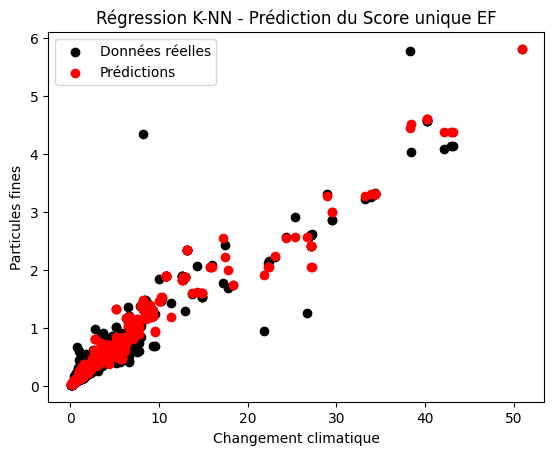

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X et y
X = dataCopy[['Changement climatique', 'Particules fines']].values
y = dataCopy['Score unique EF'].values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle K-NN pour la régression avec 7 voisins
knn_regressor = KNeighborsRegressor(n_neighbors=7)

# Entraîner le modèle sur les données d'entraînement
knn_regressor.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = knn_regressor.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Tracer les résultats
plt.scatter(X_test[:, 0], y_test, color='black', label='Données réelles')
plt.scatter(X_test[:, 0], predictions, color='red', label='Prédictions')
plt.title('Régression K-NN - Prédiction du Score unique EF')
plt.xlabel('Changement climatique')
plt.ylabel('Particules fines')
plt.legend()
plt.show()


<p>On remarque que les données réelles et leur prédiction sont assez similaires. On a seulement quelques points qui s'écartent, qui sont potentiellement des valeurs abérrantes, ou extrêmes. Cela nous amène à penser que le modèle est très bien ajusté aux valeurs.</p>
<p>On peut confirmer cela par le 'mean squared error' très faible (0.0485), qui indique une très bonne qualité du modèle, mais aussi par le 'R2' de 0.9405 qui signifie que 94.05% des variances des donnéees réelles est expliqué par le modèle.</p>
<p>On peut donc conclure que le modèle est un modèle précis et fiable.</p>

In [47]:
# Nouvelles valeurs à prédire
#    = [[ X , Y ]]
# Avec X= Valeur du Changement climatique, Y= Taux de Particules fines

# 0.674660 : moyenne du Score EF

x1 = [[14, 2]]
prednew = knn_regressor.predict(x1)[0]
result = 'Faible (<= 0.674660)' if prednew <= 0.674660 else 'Non Faible (> 0.674660)'
print("x1 : Score EF " + result)

x2 = [[2, 0]]
prednew = knn_regressor.predict(x2)[0]
result = 'Faible (<= 0.674660)' if prednew <= 0.674660 else 'Non Faible (> 0.674660)'
print("x2 : Score EF " + result)

x1 : Score EF Non Faible (> 0.674660)
x2 : Score EF Faible (<= 0.674660)
